## 70018 Privacy Engineering Coursework
### _Group 2:_  Belfiore Asia (CID: 02129867)
### 25 October - 11 November 2024 
---
## Dataset attributes:
- **area**
- **postcode**  -->  reduce to outcode (first half)
- dob (date of birth)  -->  generalise to year
- gender
- **ethnic_group**
- **_phone_number_**  -->  use as (hashed + salt ID)
- _marital_status_ [DELETE]
- qualifications
- occupation
- **income**
- **home_ownership**
- **distance_to_work_km** (0 means working from home)

## Use cases for the dataset:
- **Use case 1:** To study if there is any pay inequity between racial groups.
- **Use case 2:** To analyse how income ownership rates differ by region.
- **Use case 3:** To study the relationship between distance travelled to work and age.

In [1]:
# Import all libraries
import pandas
import numpy
import matplotlib
from matplotlib import pyplot as plt

In [95]:
""" 
    Read dataset from given csv file:
        - "dataset.csv"
            in the same directory as the .ipynb file
"""
df = pandas.read_csv("dataset.csv")
df.iloc[:3]

,area,postcode,dob,gender,ethnic_group,phone_number,marital_status,qualifications,occupation,income,home_ownership,distance_to_work_km
0,Nottingham,NG9 5SS,1989-04-18,Female,"White: English, Welsh, Scottish, Northern Iris...",447546351661,married,Level 4 (BA+) or above,9. Elementary occupations,29445,1,4.593169
1,Shropshire,SY6 0LT,1989-04-19,Female,"White: English, Welsh, Scottish, Northern Iris...",447979438189,divorced,Level 4 (BA+) or above,"1. Managers, directors and senior officials",110432,1,0.000000
2,Wakefield,LS26 0UG,1982-11-04,Female,White: Roma,447950956938,never_married,Other,"8. Process, plant and machine operatives",22891,0,6.285012


# Users with Distance to work in [0] : 36935
# Users with Distance to work in (0-10] : 41841
# Users with Distance to work in (10-20] : 8089
# Users with Distance to work in (20-30] : 8158
# Users with Distance to work in (30-40] : 2410
# Users with Distance to work in (40-50] : 2567
tot=100000


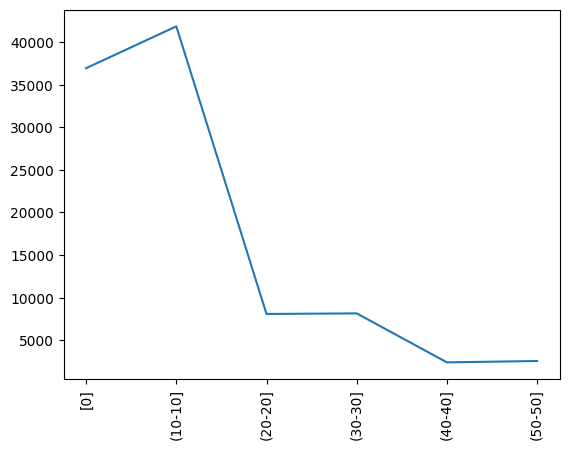

In [ ]:
# check possible 'distance_to_work_km' ranges
def check_distance_range(step):
    prev_dist = 0
    tot = df[(df['distance_to_work_km'] == 0.0)].count()['area']
    distances = {}
    distances[f"[0]"] = tot
    print(f"# Users who work from home [Distance = 0] : {tot}")
    for curr_dist in range(0,(50+step),step):
        if curr_dist != prev_dist:
            dist = df[(df['distance_to_work_km'] > prev_dist) & (df['distance_to_work_km'] <= curr_dist)].count()['area']
            print(f"# Users with Distance to work in ({prev_dist}-{curr_dist}] : {dist}")
            tot += dist
            distances[f"({prev_dist}-{curr_dist}]"] = dist
            prev_dist=curr_dist

    # print(f"tot={tot}")
    # print(distances)

    dist_ranges = (distances.items()) # sorted by key, return a list of tuples
    km_ranges, num_users = zip(*dist_ranges) # unpack a list of pairs into two tuples
    # plt.plot(km_ranges, num_users)
    plt.bar(km_ranges, num_users)
    if len(km_ranges) > 5:
        plt.xticks(rotation=90)
    plt.show()


check_distance_range(step = 5)

# ---------------------------------------------------------------

# 5 - Generalise distances into 5km step-ranges
def generalise_distance(dist, max_dist=50, step=5):
    if dist == 0.0:
        return "0"
    prev = 0
    for i in range(0,(max_dist+step),step):
        if (not(prev==i)) and (dist>prev) and (dist <=i):
            dist_range = f"{prev}-{i}"
            return dist_range
        prev = i
    return "n/a"

df['distance_to_work_km'].map(generalise_distance)

In [ ]:
# Changes 'distance_to_work_km' into step ranges of 5km
def generalise_distance(dist, max_dist=50, step=5):
    if dist == 0.0:
        return "0"
    prev = 0
    for i in range(0,(max_dist+step),step):
        if (not(prev==i)) and (dist>prev) and (dist <=i):
            dist_range = f"{prev}-{i}"
            return dist_range
        prev = i
    return "n/a"
        
df['distance_to_work_km'] = df['distance_to_work_km'].map(generalise_distance)
df.head()

,area,postcode,dob,gender,ethnic_group,phone_number,marital_status,qualifications,occupation,income,home_ownership,distance_to_work_km
0,Nottingham,NG9 5SS,1989-04-18,Female,"White: English, Welsh, Scottish, Northern Iris...",447546351661,married,Level 4 (BA+) or above,9. Elementary occupations,29445,1,0-5
1,Shropshire,SY6 0LT,1989-04-19,Female,"White: English, Welsh, Scottish, Northern Iris...",447979438189,divorced,Level 4 (BA+) or above,"1. Managers, directors and senior officials",110432,1,0
2,Wakefield,LS26 0UG,1982-11-04,Female,White: Roma,447950956938,never_married,Other,"8. Process, plant and machine operatives",22891,0,5-10
3,Tunbridge Wells,TN5 2QQ,2007-12-10,Female,"White: English, Welsh, Scottish, Northern Iris...",447970878589,never_married,Level 1 (School),No occupation,4469,0,0
4,Walsall,WS3 1GO,1950-01-15,Male,"White: English, Welsh, Scottish, Northern Iris...",447659064207,married,Level 1 (School),4. Administrative and secretarial occupations,26406,0,15-20


Atrribute 'marital_status':
divorced: 24307
married: 36666
never_married: 33826
widowed: 5201


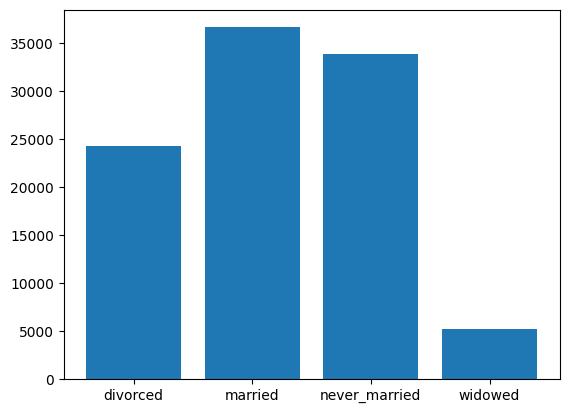

In [100]:
# check how many entries match each attribute value range
def get_attribute_ranges(column_name):
    print(f"Atrribute '{column_name}':")
    grouped_df = df.groupby(column_name).count()['dob'].to_dict()
    for key, val in grouped_df.items():
        print(f"{key}: {val}")
    # return grouped_df

    val_ranges = (grouped_df.items()) # sorted by key, return a list of tuples
    x, y = zip(*val_ranges) # unpack a list of pairs into two tuples
    # plt.plot(x, y)
    plt.bar(x, y)
    if len(x) > 5:
        plt.xticks(rotation=90)
    plt.show()

get_attribute_ranges('marital_status')